In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.transforms import blended_transform_factory

from paiskintonetools import setup_matplotlib
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import ImageGrid

setup_matplotlib(dpi=300)
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

FileNotFoundError: [Errno 2] No such file or directory: 'intermediate_results/p0_bv1E0.npy'

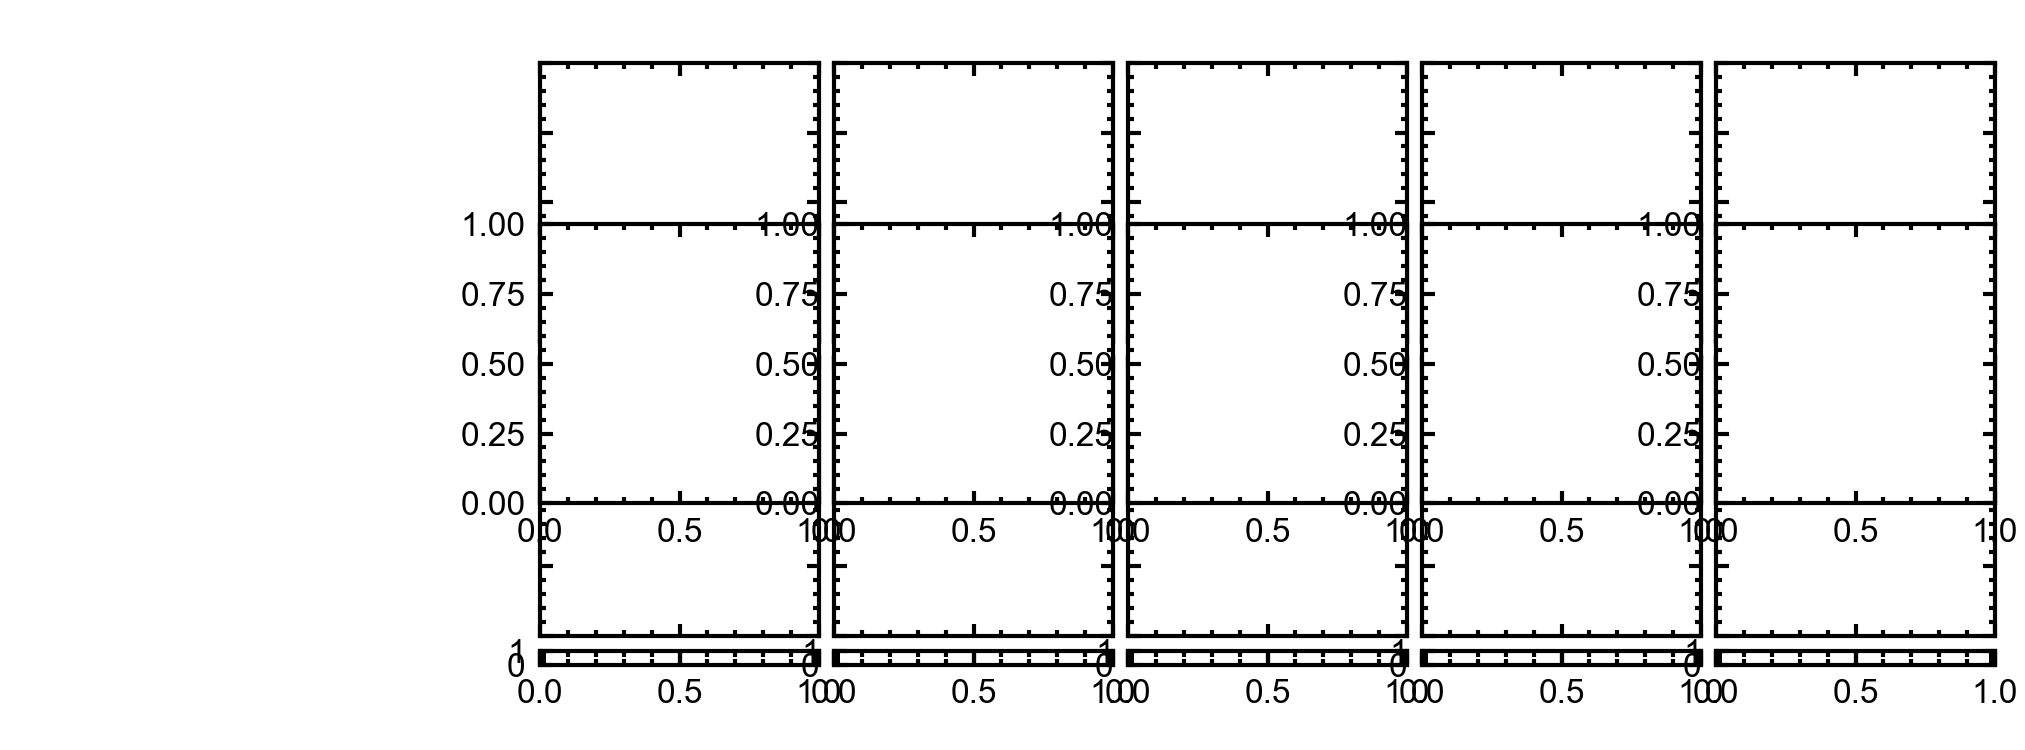

In [2]:
total_fig = plt.figure(constrained_layout=False, figsize=(6.75, 2.5))
figa, fig = total_fig.subfigures(1, 2, width_ratios=[1.75, 5])
axes_images = ImageGrid(
    fig,
    (0.01, 0.03, 0.97, 0.97),  # similar to subplot(111)
    nrows_ncols=(2, 5),  # creates 2x2 grid of Axes
    axes_pad=0.05,  # pad between Axes in inch.
    share_all=True,
    label_mode="all",
    cbar_mode="edge",
    cbar_location="bottom",
)

test = ImageGrid(
    fig,
    (0.01, 0.03, 0.97, 0.97),  # similar to subplot(111)
    nrows_ncols=(1, 5),  # creates 2x2 grid of Axes
    axes_pad=0.05,  # pad between Axes in inch.
    share_all=True,
    label_mode="all",
    cbar_mode=None,
)

for ax in axes_images:
    ax.yaxis.set_tick_params(labelleft=False)
    ax.xaxis.set_tick_params(labelbottom=False)

asb = AnchoredSizeBar(
    axes_images[-1].transData,
    0.01,
    "1 cm",
    loc="lower right",
    pad=0.1,
    borderpad=0.5,
    sep=5,
    frameon=False,
    color="white",
)
geometry = "arc"

images = [
    [
        np.log(0.01 + np.fliplr(np.load("intermediate_results/p0_bv1E0.npy")) / 10),
        np.load("intermediate_results/density.npy"),
        np.log(1 + np.load(f"output_images/pa_{geometry}_bv1E0.npy") * 1e6),
        np.load(f"output_images/ruct_{geometry}.npy") * 10,
        np.load(f"output_images/mus_{geometry}_bv1E0.npy") * 1e8,
    ],
    [
        np.log(0.01 + np.fliplr(np.load("intermediate_results/p0_bv1E-2.npy"))),
        np.load("intermediate_results/density.npy"),
        np.log(1 + np.load(f"output_images/pa_{geometry}_bv1E-2.npy") * 1e7),
        np.load(f"output_images/ruct_{geometry}.npy") * 10,
        np.load(f"output_images/mus_{geometry}_bv1E-2.npy") * 1e8,
    ],
]
cmaps = ["gray", "viridis", "gray", "bone", "magma"]

axes_images[0].add_artist(asb)
extent = (-0.02, 0.02) * 2

ims = []
for j in range(2):
    for i in range(5):
        if images[j][i] is not None:
            if i == 0:
                clim = None  # (0, 0.01)
            else:
                clim = None
            im = axes_images[i + j * 5].imshow(
                images[j][i],
                origin="lower",
                cmap=cmaps[i],
                extent=extent,
                clim=clim,
                interpolation="none",
            )
        else:
            im = None
        if j == 0:
            ims.append(im)

titles = ["Model p$_0$", "Model density", "PA", "US", "mUS"]

for i in range(5):
    cbar = axes_images.cbar_axes[i].colorbar(ims[i])
    cbar.set_label(
        "(a.u.)" if i != 1 else "(kgm$^{-3}$)", fontsize="small", va="center"
    )
    if i != 1:
        cbar.ax.xaxis.set_ticks(ims[i].get_clim(), labels=["MIN", "MAX"], minor=False)
        cbar.ax.xaxis.set_ticks([], minor=True)
        for label, ha in zip(cbar.ax.xaxis.get_ticklabels(), ["left", "right"]):
            label.set_ha(ha)
            label.set_fontsize("medium")

for i in [1, 6, 3, 8]:
    axes_images[i].remove()

for i in [1, 3]:
    test[i].yaxis.set_tick_params(labelleft=False)
    test[i].xaxis.set_tick_params(labelbottom=False)

test[1].imshow(images[0][1], origin="lower", cmap=cmaps[1], extent=extent)
test[3].imshow(np.fliplr(images[0][3]), origin="lower", cmap=cmaps[3], extent=extent)

for i in [0, 2, 4]:
    test[i].remove()

for ax, title, letter in zip(
    [axes_images[0], test[1], axes_images[2], test[3], axes_images[4]], titles, "ABCDE"
):
    transform = blended_transform_factory(ax.transAxes, axes_images[0].transAxes)
    fig.text(
        0.5, 1.1, title, transform=transform, ha="center", va="center", fontsize="small"
    )
    fig.text(
        0.0,
        1.1,
        letter,
        transform=transform,
        ha="left",
        va="center",
        fontsize="medium",
        fontweight="bold",
    )

for ax, title in zip(
    [axes_images[0], axes_images[5]], ["Low melanin limit", "High melanin limit"]
):
    fig.text(
        -0.05,
        0.5,
        title,
        transform=ax.transAxes,
        ha="right",
        va="center",
        fontsize="medium",
        rotation=90,
    )

ax = figa.subplots()
ax.axis("off")

transform = blended_transform_factory(figa.transSubfigure, axes_images[0].transAxes)
rectangle = mpatches.FancyBboxPatch(
    (0.1, 1 / 24),
    0.8,
    11 / 12,
    ec="#B89F88",
    boxstyle=mpatches.BoxStyle("Round", pad=0.02),
    transform=transform,
    fc="none",
)
ax.add_patch(rectangle)
figa.text(
    0.5,
    5 / 6,
    "Low melanin limit",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
    fontweight="bold",
)
figa.text(
    0.5,
    2 / 3 - 1 / 24,
    "Primary photoacoustic signal",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
)
figa.text(
    0.5,
    0.5,
    r"$<$",
    transform=transform,
    va="center",
    ha="center",
    rotation=90,
    fontsize="small",
)
figa.text(
    0.5,
    1 / 3 + 1 / 24,
    "Plane wave signal",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
)
figa.text(
    0.5,
    1 / 6,
    r"PA $\approx$ p$_0$",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
)

transform = blended_transform_factory(figa.transSubfigure, axes_images[5].transAxes)
rectangle = mpatches.FancyBboxPatch(
    (0.1, 1 / 24),
    0.8,
    11 / 12,
    ec="#8C6F61",
    boxstyle=mpatches.BoxStyle("Round", pad=0.02),
    transform=transform,
    fc="none",
)
ax.add_patch(rectangle)

figa.text(
    0.5,
    5 / 6,
    "High melanin limit",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
    fontweight="bold",
)
figa.text(
    0.5,
    1 / 3 + 1 / 24,
    "Primary photoacoustic signal",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
)
figa.text(
    0.5,
    0.5,
    r"$<$",
    transform=transform,
    va="center",
    ha="center",
    rotation=90,
    fontsize="small",
)
figa.text(
    0.5,
    2 / 3 - 1 / 24,
    "Plane wave signal",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
)
figa.text(
    0.5,
    1 / 6,
    r"mUS $\approx$ US",
    transform=transform,
    va="center",
    ha="center",
    fontsize="small",
)


def draw_arrow(aim, angle, ax, color):
    length_arrow = 0.003
    dx, dy = (
        np.cos(np.deg2rad(angle)) * length_arrow,
        np.sin(np.deg2rad(angle)) * length_arrow,
    )
    x, y = aim[0] + dx, aim[1] + dy
    ax.arrow(
        x,
        y,
        -dx,
        -dy,
        length_includes_head=True,
        width=3e-4,
        color=color,
        head_length=3 * 3e-4,
        head_width=4 * 3e-4,
    )


draw_arrow((0.0, -0.0015), -45, axes_images[0], "white")
draw_arrow((0.0, -0.0015), -45, axes_images[5], "white")
draw_arrow((0.0, -0.0015), -45, axes_images[2], "white")
draw_arrow((0.0, -0.0015), -45, axes_images[7], "white")
draw_arrow((0.0025, 0.0025), 45, axes_images[4], "red")
draw_arrow((0.0125, -0.005), 45, axes_images[7], "red")
draw_arrow((0.0015 + 0.0015 * 5, 0), 45, test[1], "white")
draw_arrow((0.0015 + 0.0015 * 5, 0), 45, test[3], "white")
draw_arrow((0.0015 + 0.0015 * 5, 0), 45, axes_images[9], "white")

total_fig.savefig("us_from_pa.png", dpi=300)
total_fig.savefig("us_from_pa.pdf", dpi=300)
plt.show()